In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings



In [69]:
df=pd.read_csv('StudentsPerformance.csv')

In [70]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [71]:
x=df.drop(columns=['math score'],axis=1)
len(x)

1000

In [72]:
print(len(x))

1000


In [73]:
y=df['math score']
len(y)

1000

In [74]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [75]:
numericalf=x.select_dtypes(exclude='object').columns
categorical=x.select_dtypes(include='object').columns



1000


## Setting a Preprocessing Pipeline

In [76]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [("OneHotEncoder",oh_transformer,categorical),
     ("StandardScaler",numeric_transformer,numericalf),
     ]
)

x=preprocessor.fit_transform(x)

x.shape

(1000, 19)

### split dataset into train test split


In [77]:
from sklearn.model_selection import train_test_split

In [55]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=42)

In [98]:
#Create an Evaluate function to evaluate all metrices

def eveluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    rtwoscore=r2_score(true,predicted)
    return mae,rmse,rtwoscore



In [105]:
models={
    "LinearRegression":LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbours Regression":KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(verbose=False),
    "AdaBoostRegressor":AdaBoostRegressor()

}
model_list=[]
r2_list=[]

for i in range(len(list(models))):

    model=list(models.values())[i]
    model.fit(xtrain,ytrain)# trained model
    #predictions
    ytrainprediction=model.predict(xtrain)
    ytestprediction=model.predict(xtest)
    model_train_mae,model_train_rmse,model_train_r2score=eveluate_model(ytrain,ytrainprediction)
    model_test_mae,model_train_rmse,model_test_r2score=eveluate_model(ytest,ytestprediction)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for Training set")
    print(f"RootMeanSquared Error :{model_train_rmse}")
    print(f"Mean Absolute Error : {model_train_mae}")
    print(f"R2score Error : {model_train_r2score}")
    

    print("Model performance for Test set")
    print(f"RootMeanSquared Error : {model_test_r2score}")
    print(f"mean_squared_error : {model_test_mae}")
    print(f"mean Absolute Erroe : {model_test_mae}")
    r2_list.append(model_test_r2score)
    print('='*35)
    print('\n')

    



LinearRegression
Model performance for Training set
RootMeanSquared Error :5.3959872842671395
Mean Absolute Error : 4.267109375
R2score Error : 0.8742565651513869
Model performance for Test set
RootMeanSquared Error : 0.8803449074540941
mean_squared_error : 4.2158203125
mean Absolute Erroe : 4.2158203125


Lasso
Model performance for Training set
RootMeanSquared Error :6.519694535667419
Mean Absolute Error : 5.206302661246526
R2score Error : 0.8071462015863456
Model performance for Test set
RootMeanSquared Error : 0.8253197323627853
mean_squared_error : 5.157881810347763
mean Absolute Erroe : 5.157881810347763


Ridge
Model performance for Training set
RootMeanSquared Error :5.390387016935642
Mean Absolute Error : 4.264987823725981
R2score Error : 0.8743042615212909
Model performance for Test set
RootMeanSquared Error : 0.8805931485028737
mean_squared_error : 4.2111006880142625
mean Absolute Erroe : 4.2111006880142625


K-Neighbours Regression
Model performance for Training set
RootMea

In [106]:
pd.DataFrame(zip(model_list,r2_list),columns=['ModelName','r2_score']).sort_values(by=["r2_score"],ascending=False)

,ModelName,r2_score
2,Ridge,0.880593
0,LinearRegression,0.880345
5,RandomForestRegressor,0.851685
7,CatBoostRegressor,0.851632
8,AdaBoostRegressor,0.843217
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbours Regression,0.783813
4,Decision Tree,0.760847


## *Linear Regression*


In [111]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(xtest,ytest)
y_pred=lin_model.predict(xtest)
score=r2_score(ytest,y_pred)*100
print(f"Accuracy of the Model {score}")

Accuracy of the Model 89.53420170109067


Text(0, 0.5, 'Predicted')

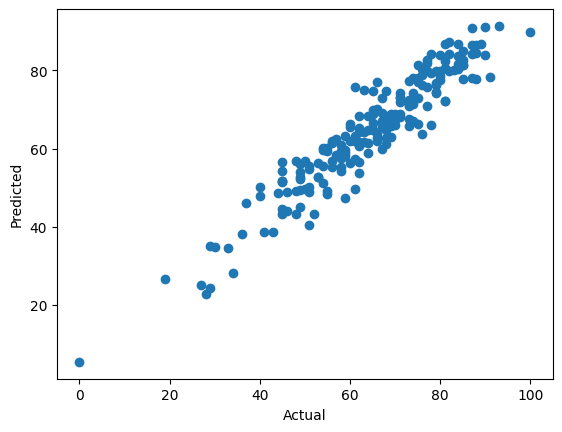

In [113]:
plt.scatter(ytest,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<Axes: xlabel='math score'>

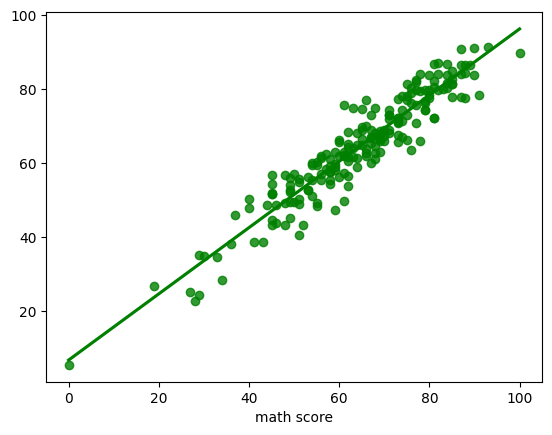

In [115]:
sns.regplot(x=ytest,y=y_pred,ci=None,color='Green')

In [118]:
predictedDifference=pd.DataFrame({'Actual':ytest,'Predicted':y_pred,'Difference':ytest-y_pred})

In [119]:
predictedDifference

,Actual,Predicted,Difference
521,91,78.332766,12.667234
737,53,56.248521,-3.248521
740,80,77.540740,2.459260
660,74,78.085860,-4.085860
411,84,83.710872,0.289128
...,...,...,...
408,52,43.390925,8.609075
332,62,60.538763,1.461237
208,74,67.162898,6.837102
613,65,68.889810,-3.889810
